In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np



In [2]:

# Loaded variable 'df' from URI: /home/red/cda_project-1/data/salaries.csv

df = pd.read_csv(r"data/salaries.csv")
# Data Science and Data Science adjacent roles
df = df[
df["Job Title"].isin(["AI Architect",
"AI Developer",
"AI Engineer",
"AI Product Manager",
"AI Programmer",
"AI Research Engineer",
"AI Scientist",
"Analytics Engineer",
"Analytics Engineering Manager",
"Applied Data Scientist",
"Applied Machine Learning Engineer",
"Applied Machine Learning Scientist",
"Data Analytics Consultant",
"Data Analytics Engineer",
"Data Analytics Lead",
"Data Analytics Manager",
"Data Analytics Specialist",
"Data Engineer",
"Data Modeler",
"Data Modeller",
"Data Science",
"Data Science Consultant",
"Data Science Director",
"Data Science Engineer",
"Data Science Lead",
"Data Science Manager",
"Data Science Practitioner",
"Data Science Tech Lead",
"Data Scientist",
"Data Scientist Lead",
"Data Visualization Analyst",
"Data Visualization Engineer",
"Data Visualization Specialist",
"Decision Scientist",
"Deep Learning Engineer",
"Deep Learning Researcher",
"Director of Data Science",
"Head of Data Science",
"Head of Machine Learning",
"Insight Analyst",
"Lead Data Scientist",
"Lead Machine Learning Engineer",
"Machine Learning Developer",
"Machine Learning Engineer",
"Machine Learning Infrastructure Engineer",
"Machine Learning Manager",
"Machine Learning Modeler",
"Machine Learning Operations Engineer",
"Machine Learning Research Engineer",
"Machine Learning Researcher",
"Machine Learning Scientist",
"Machine Learning Software Engineer",
"Machine Learning Specialist",
"Manager Data Management",
"Managing Director Data Science",
"ML Engineer",
"MLOps Engineer",
"NLP Engineer",
"Principal Data Scientist",
"Principal Machine Learning Engineer",
"Prompt Engineer",
"Research Scientist",])]

In [3]:
df[df["Company Location"].eq("United States")].groupby(["Company Location", "Employee Residence" ]).count()

Job Title  Employment Type  \
Company Location Employee Residence                                            
United States    Argentina                                1                1   
                 Belgium                                  2                2   
                 Bolivia, Plurinational State of          2                2   
                 Brazil                                   1                1   
                 Canada                                   2                2   
                 France                                   1                1   
                 Germany                                  1                1   
                 Greece                                   1                1   
                 India                                    5                5   
                 Italy                                    2                2   
                 Philippines                              1                1   
                 Portugal                                 1                1   
                 Romania                                  1                1   
                 Russian Federation                       1                1   
                 Spain                                    2                2   
                 Thailand                                 1                1   
                 Tunisia                                  1                1   
                 Turkey                                   1                1   
                 Uganda                                   1                1   
                 United States                         3033             3033   
                 Uzbekistan                               1                1   
                 Viet Nam                                 1                1   

                                                  Experience Level  \
Company Location Employee Residence                                  
United States    Argentina                                       1   
                 Belgium                                         2   
                 Bolivia, Plurinational State of                 2   
                 Brazil                                          1   
                 Canada                                          2   
                 France                                          1   
                 Germany                                         1   
                 Greece                                          1   
                 India                                           5   
                 Italy                                           2   
                 Philippines                                     1   
                 Portugal                                        1   
                 Romania                                         1   
                 Russian Federation                              1   
                 Spain                                           2   
                 Thailand                                        1   
                 Tunisia                                         1   
                 Turkey                                          1   
                 Uganda                                          1   
                 United States                                3033   
                 Uzbekistan                                      1   
                 Viet Nam                                        1   

                                                  Expertise Level  Salary  \
Company Location Employee Residence                                         
United States    Argentina                                      1       1   
                 Belgium                                        2       2   
                 Bolivia, Plurinational State of                2       2   
                 Brazil                                        

In [5]:
df[df["Company Location"]=="United States"].drop(columns=["Salary", "Salary Currency", "Company Location"])

,Job Title,Employment Type,Experience Level,Expertise Level,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States,Medium,2024
14,AI Architect,Full-Time,Senior,Expert,198650,United States,Medium,2024
15,AI Architect,Full-Time,Senior,Expert,137000,United States,Medium,2024
20,Data Scientist,Full-Time,Mid,Intermediate,166000,United States,Medium,2024
...,...,...,...,...,...,...,...,...
5724,Data Engineer,Full-Time,Mid,Intermediate,130800,Spain,Medium,2020
5728,Applied Machine Learning Scientist,Full-Time,Mid,Intermediate,423000,United States,Large,2021
5731,Data Scientist,Full-Time,Senior,Expert,412000,United States,Large,2020
5732,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States,Large,2021


In [6]:
xdf = pd.get_dummies(df.select_dtypes("object"), drop_first = True)

In [7]:
xdf = pd.concat([df.select_dtypes(exclude="object"), xdf], axis=1)
xdf

,Salary,Salary in USD,Year,Job Title_AI Developer,Job Title_AI Engineer,Job Title_AI Product Manager,Job Title_AI Programmer,Job Title_AI Research Engineer,Job Title_AI Scientist,Job Title_Analytics Engineer,...,Employee Residence_Turkey,Employee Residence_Uganda,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Medium,Company Size_Small
0,138000,138000,2024,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,86000,86000,2024,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
14,198650,198650,2024,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
15,137000,137000,2024,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
20,166000,166000,2024,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,24000,28369,2021,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5731,412000,412000,2020,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5732,151000,151000,2021,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5733,105000,105000,2020,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [8]:
xdf.loc[5735, :][xdf.loc[5735, :] != False]

Salary                            7000000
Salary in USD                       94665
Year                                 2021
Job Title_Data Science Manager       True
Employment Type_Full-Time            True
Experience Level_Senior              True
Expertise Level_Expert               True
Salary Currency_Indian Rupee         True
Company Location_India               True
Employee Residence_India             True
Name: 5735, dtype: object

In [9]:
y = xdf["Salary in USD"].values.ravel()
X = xdf.loc[:, "Year":]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = .2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
alphas = np.logspace(.001, 8)/100
penalties = [.1, .5, .7, .9, .95, .99, 1]
alphas

array([1.00230524e-02, 1.45963712e-02, 2.12564040e-02, 3.09552769e-02,
       4.50795520e-02, 6.56484520e-02, 9.56025305e-02, 1.39224057e-01,
       2.02749216e-01, 2.95259637e-01, 4.29980717e-01, 6.26172337e-01,
       9.11882278e-01, 1.32795596e+00, 1.93387577e+00, 2.81626469e+00,
       4.10127006e+00, 5.97259774e+00, 8.69777489e+00, 1.26663960e+01,
       1.84458197e+01, 2.68622791e+01, 3.91190010e+01, 5.69682204e+01,
       8.29616825e+01, 1.20815443e+02, 1.75941118e+02, 2.56219539e+02,
       3.73127401e+02, 5.43377987e+02, 7.91310519e+02, 1.15236972e+03,
       1.67817302e+03, 2.44388988e+03, 3.55898806e+03, 5.18288328e+03,
       7.54772949e+03, 1.09916078e+04, 1.60068591e+04, 2.33104695e+04,
       3.39465715e+04, 4.94357146e+04, 7.19922446e+04, 1.04840869e+05,
       1.52677665e+05, 2.22341437e+05, 3.23791397e+05, 4.71530950e+05,
       6.86681112e+05, 1.00000000e+06])

In [12]:
ecv = ElasticNetCV(alphas=alphas, l1_ratio = penalties, cv=10, verbose=1, max_iter=100_000)
ecv.fit(X_train, y_train)


..................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=array([1.00230524e-02, 1.45963712e-02, 2.12564040e-02, 3.09552769e-02,
       4.50795520e-02, 6.56484520e-02, 9.56025305e-02, 1.39224057e-01,
       2.02749216e-01, 2.95259637e-01, 4.29980717e-01, 6.26172337e-01,
       9.11882278e-01, 1.32795596e+00, 1.93387577e+00, 2.81626469e+00,
       4.10127006e+00, 5.97259774e+00, 8.69777489e+00, 1.26663960e+01,
       1.84458197e+01, 2.686227...
       3.73127401e+02, 5.43377987e+02, 7.91310519e+02, 1.15236972e+03,
       1.67817302e+03, 2.44388988e+03, 3.55898806e+03, 5.18288328e+03,
       7.54772949e+03, 1.09916078e+04, 1.60068591e+04, 2.33104695e+04,
       3.39465715e+04, 4.94357146e+04, 7.19922446e+04, 1.04840869e+05,
       1.52677665e+05, 2.22341437e+05, 3.23791397e+05, 4.71530950e+05,
       6.86681112e+05, 1.00000000e+06]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000, verbose=1)

In [13]:
ecv.alpha_, ecv.l1_ratio_

(1152.3697163483166, 1.0)

In [14]:
(ecv.coef_ >0 ).sum()

28

In [19]:
X.columns[ecv.coef_ >0.001]

Index(['Year', 'Job Title_AI Developer',
       'Job Title_Analytics Engineering Manager',
       'Job Title_Data Science Manager', 'Job Title_Deep Learning Engineer',
       'Job Title_Director of Data Science', 'Job Title_ML Engineer',
       'Job Title_Machine Learning Engineer',
       'Job Title_Machine Learning Scientist',
       'Job Title_Machine Learning Software Engineer',
       'Job Title_Managing Director Data Science',
       'Job Title_Principal Data Scientist', 'Job Title_Research Scientist',
       'Experience Level_Executive', 'Salary Currency_Israeli New Shekel',
       'Salary Currency_Swiss Franc', 'Salary Currency_United States Dollar',
       'Company Location_Australia', 'Company Location_Canada',
       'Company Location_Qatar', 'Employee Residence_Canada',
       'Employee Residence_Germany', 'Employee Residence_Israel',
       'Employee Residence_Qatar', 'Employee Residence_Switzerland',
       'Employee Residence_United Kingdom', 'Employee Residence_United S

In [20]:
y_pred = ecv.predict(X_test)

<Axes: >

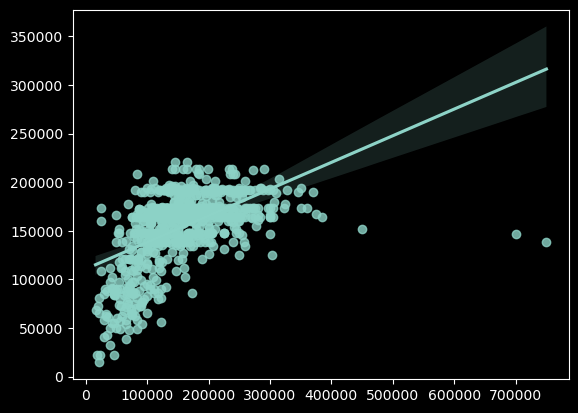

In [17]:
sns.regplot(x=y_test, y=y_pred, )

In [18]:
scaler.inverse_transform(ecv.coef_[:])

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.81213139e+03  3.58568448e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.94758797e+02
  3.95792736e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.82047116e+01  0.00000000e+00 -6.15240314e+02
 -8.28602325e+02 -4.19358489e+03 -7.89313165e+02 -0.00000000e+00
 -0.00000000e+00 -1.44243409e+03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.64173512e+03 -1.87811634e+02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.31346997e+01
 -1.10020614e+03 -0.00000000e+00  1.37175906e+02  0.00000000e+00
  2.52266831e+03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  6.25328512e+03 -0.00000000e+00
 -0.00000000e+00  6.30157486e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.44724543e+03  1.27923690e+03 -0.00000000e+00  0.00000000e+00
  8.43857346e+02 -0.00000000e+00  2.02431432e+03  0.00000000e+00
 -0.00000000e+00  3.51995556e+03 -8.39589711e+02  0.00000000e+00
  0.00000000e+00  6.10841760e+03 -6.00620881e+03  0.00000000e+00
  0.00000000e+00 -5.11930812e+03 -1.28809794e+04 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.88298849e+02 -0.00000000e+00 -0.00000000e+00 -1.39414828e+02
  3.93862236e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.37892616e+02
 -0.00000000e+00 -8.71170247e+01  1.33124205e+04  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.14104219e-02  9.18632062e+02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00170908e+02
  3.26025957e+03 -0.00000000e+00  0.00000000e+00 -3.30834828e+02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -6.00510599e-01
 -5.85870706e+02 -4.68658437e+01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.22151400e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.38288664e+02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.51489106e+00  0.00000000e+00  0.00000000e+00 -4.11513691e+02
  0.00000000e+00 -1.87610946e+02 -0.00000000e+00 -1.41158594e+03
  0.00000000e+00  2.17413518e+03 -0.00000000e+00 -3.12387626e+02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.27913609e+03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.87756220e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.83102158e+03
 -6.73227072e+01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.61028518e+03  8.13819083e+02
 -0.00000000e+00 -4.47472879e+02 -0.00000000e+00 -0.00000000e+00
 -5.06164779e+02  0.00000000e+00  0.00000000e+00 -1.13229670e+02
 -1.69526551e+02 -0.00000000e+00 -0.00000000e+00 -2.68606075e+02
  9.08009598e+02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.03151006e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.05107383e+02 -4.05595824e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.22521326e+02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.00408483e+02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.91447632e+00 -0.00000000e+00
 -5.25919450e+02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.32688062e+01 -8.21606022e+02  0.00000000e+00 -3.67377767e+01
 -1.06070112e+02 -0.00000000e+00 -0.00000000e+00  3.55939032e+03
  1.38625270e+04 -0.00000000e+00 -1.34890805e+03  4.04963830e+02
 -2.18233684e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.